In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from math import sin, cos, pi
import pandas as pd
df = pd.read_excel(r'C:\Users\a475039\Desktop\TCC Dataset\PR_2019_2023.xlsx')

In [3]:
df['gravidade'] = df['feridos_leves'] + 3 * df['feridos_graves'] + 5 * df['mortos'] 


In [4]:
df.columns

Index(['Source.Name', 'id', 'data_inversa', 'dia_semana', 'horario', 'uf',
       'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'gravidade'],
      dtype='object')

c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\

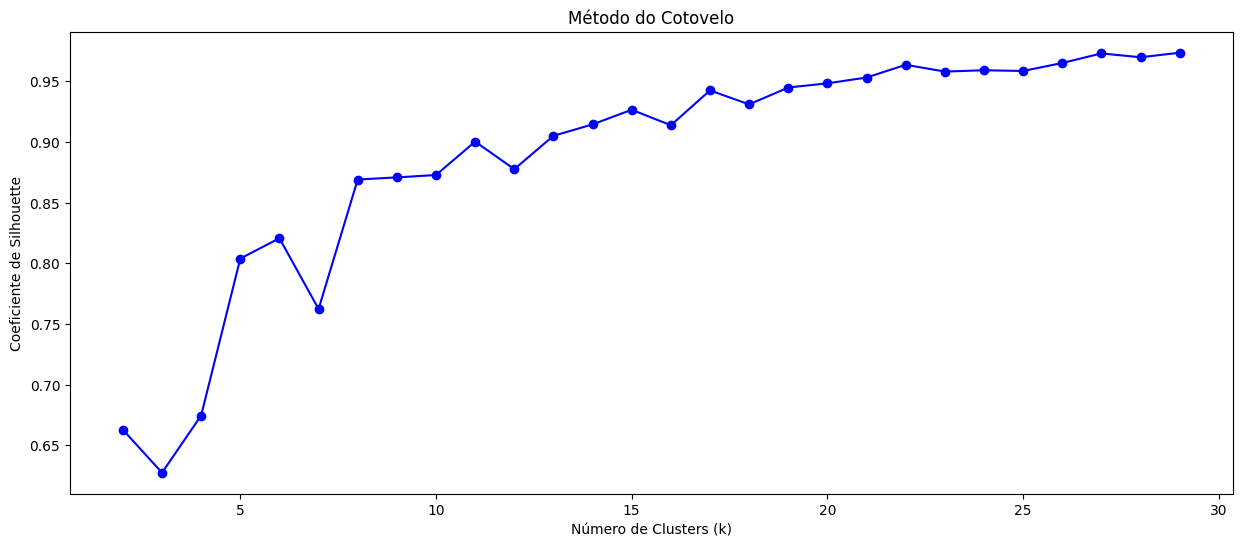

In [5]:
data = df[['feridos_leves', 'feridos_graves', 'mortos']]

# pesos = {'feridos_leves': 0.5, 'feridos_graves': 1, 'mortos': 2.0}

# # Aplicando pesos aos dados

# for col, peso in pesos.items():
#     data[col] *= peso

# Tratar valores ausentes
data = data.dropna()

# Escalonar os dados
scaler = StandardScaler()
data = scaler.fit_transform(data)


# Determinar o número ideal de clusters
silhouette_scores = []
k_values = range(2, 30)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

# Plotar o método do cotovelo
plt.figure(figsize=(15, 6))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Método do Cotovelo')
plt.show()


c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\

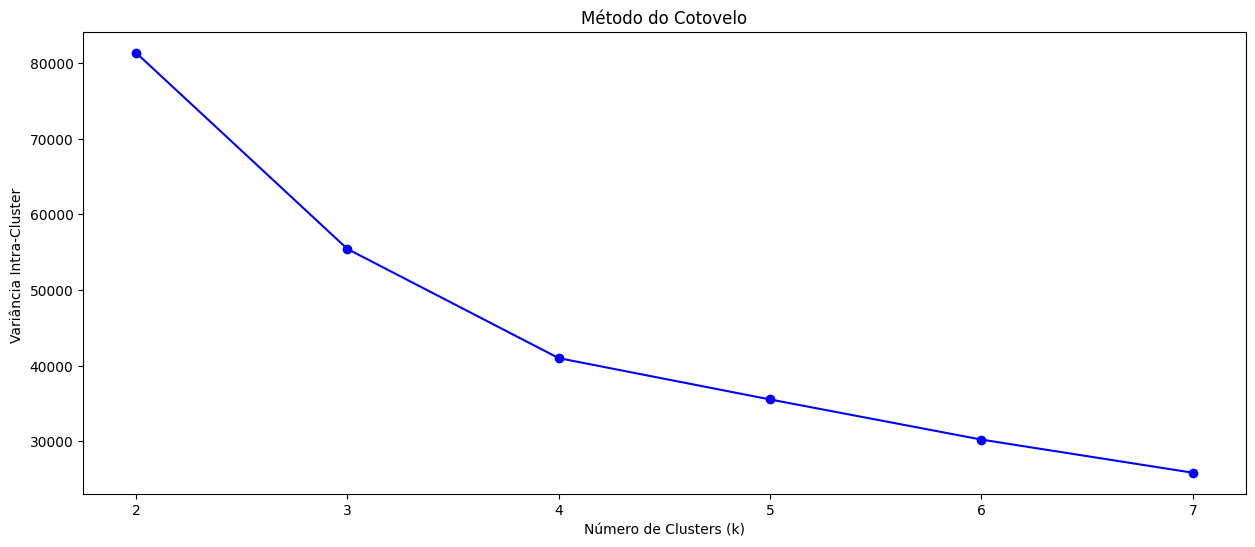

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the relevant columns
data = df[['feridos_leves', 'feridos_graves', 'mortos']]

# # Define weights for each feature
# pesos = {'feridos_leves': 0.5, 'feridos_graves': 1, 'mortos': 2.0}

# # Apply weights to the data
# for col, peso in pesos.items():
#     data[col] *= peso

# Drop rows with missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Determine the number of clusters using the elbow method (WCSS)
wcss = []
k_values = range(2, 8)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS

# Plot the elbow method
plt.figure(figsize=(15, 6))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Variância Intra-Cluster ')
plt.title('Método do Cotovelo')
plt.show()


c:\Users\a475039\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


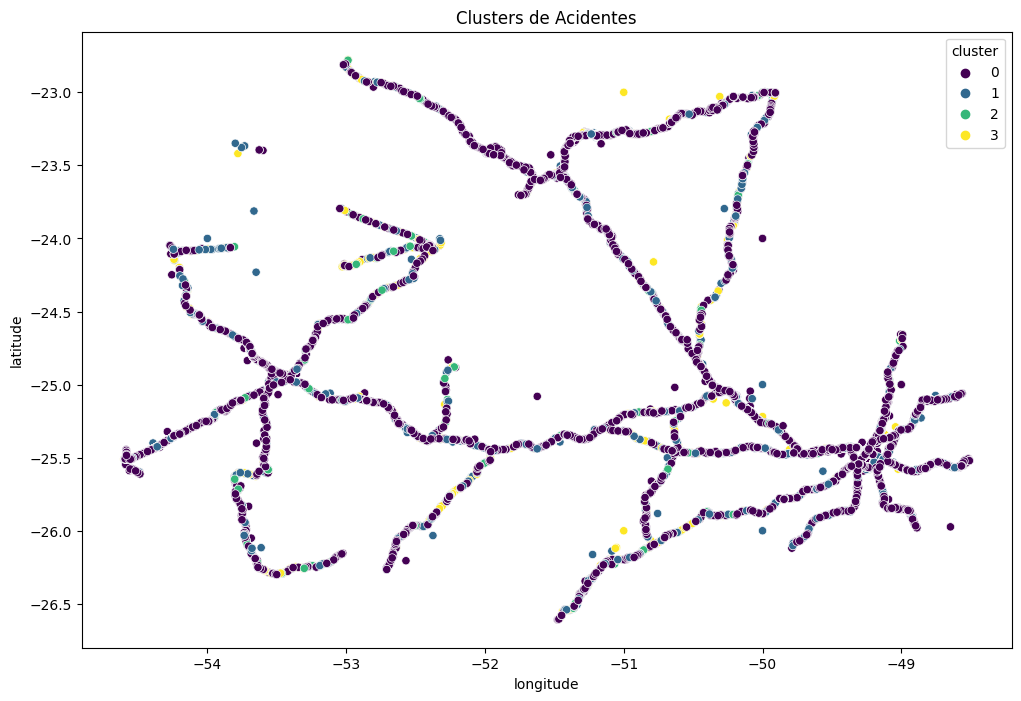

                 id         br         km  pessoas  mortos  feridos_leves  \
cluster                                                                     
0        7057795239  5716760.0  4674639.3    42402     338          22633   
1        3355457894  2611523.0  2354099.4    17495    1663              6   
2         552637014   436832.0   389075.9     8279     130           5490   
3        2788293674  2312004.0  1883786.4    18675     596           1650   

         feridos_graves  ilesos  ignorados  feridos  veiculos       latitude  \
cluster                                                                        
0                   290   17274       1867    22923     32551 -472308.138120   
1                     0   13449       2377        6     14777 -222926.349228   
2                   538    1925        196     6028      3083  -36339.943820   
3                  9012    6238       1179    10662     13936 -185566.340953   

             longitude  gravidade  
cluster             

C:\Users\a475039\AppData\Local\Temp\ipykernel_44136\94355574.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = df.groupby('cluster').sum()


In [20]:
optimal_k = 4  # número ideal de grupos

# Aplicaçãp k-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data)

# Adicionar os clusters ao dataframe original
df['cluster'] = clusters

# Visualização geográfica dos clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=df, palette='viridis')
plt.title('Clusters de Acidentes')
plt.show()

# Analisar características dos clusters
cluster_summary = df.groupby('cluster').sum()

print(cluster_summary)

In [21]:
selected_columns = cluster_summary[['mortos', 'feridos_leves', 'feridos_graves']]

selected_columns.head(8)

,mortos,feridos_leves,feridos_graves
cluster,,,
0,338,22633,290
1,1663,6,0
2,130,5490,538
3,596,1650,9012


Cluster 0:
count    8890.000000
mean        0.935996
std         2.204848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        26.000000
Name: gravidade, dtype: float64
Cluster 1:
count    4662.000000
mean        2.832261
std         1.993490
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        28.000000
Name: gravidade, dtype: float64
Cluster 2:
count    16362.000000
mean         1.276311
std          0.975646
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         11.000000
Name: gravidade, dtype: float64
Cluster 3:
count    572.000000
mean       7.171329
std        9.041373
min        4.000000
25%        4.000000
50%        5.000000
75%        7.000000
max      144.000000
Name: gravidade, dtype: float64
Cluster 4:
count    6275.000000
mean        4.210996
std         3.010730
min         3.000000
25%         3.000000
50%         3.000000
75%         3.00000

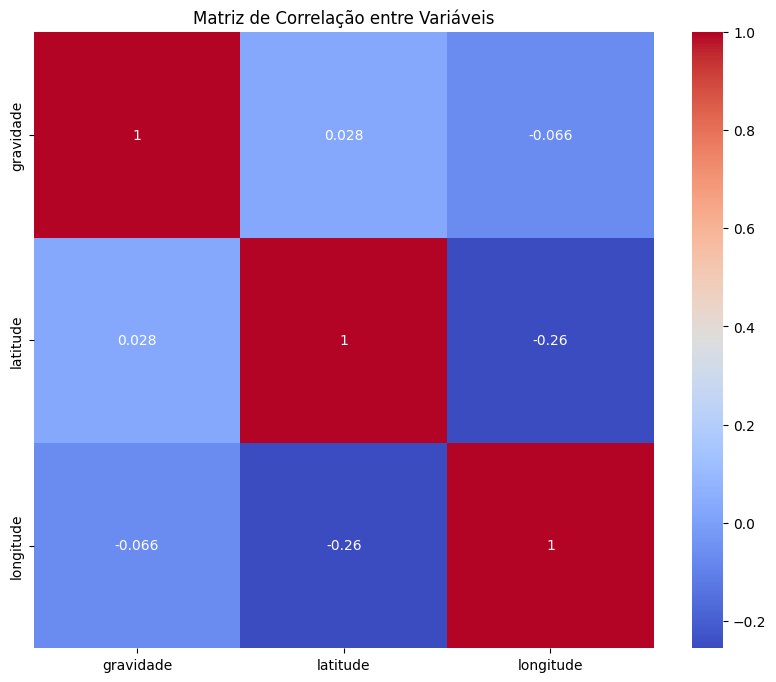

In [8]:
for cluster in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data['gravidade'].describe())

# Análise de Correlação
correlation_matrix = df[['gravidade', 'latitude', 'longitude']].corr()
print("Matriz de Correlação:")
print(correlation_matrix)

# Visualização de Correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

In [9]:
df.columns

Index(['Source.Name', 'id', 'data_inversa', 'dia_semana', 'horario', 'uf',
       'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'gravidade', 'cluster'],
      dtype='object')